In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections


# seaborn colors
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]



In [68]:
# { 
#   nomination:,
#   contents: {
#                 difficulty:
#                 tags :
#             }
# problem_id :
# }

with open('feedback.txt') as f:
    ind=0
    df3 = pd.DataFrame(columns=['problem_id','difficulty','tags','quality','nomination'])
    df4 = pd.DataFrame(columns=['problem_id','difficulty','tag','quality'])
    total_records_at_least_one_tag=0
    
    
    for l in f:
        df = pd.read_json(l,orient='records')
        problem_id=None
        difficuly=None
        tags=None
        quality=None
        nomination=None
        
        dictn={}
        dictx={}
        
        dictn['problem_id']=df.iloc[0][2]
        dictx['problem_id']=dictn['problem_id']
        
        dictn['nomination'] = df.iloc[0][1]
        
        if 'difficulty' in df.index:
            dictn['difficulty']=df.loc['difficulty']['contents']
            dictx['difficulty']=dictn['difficulty']
        if 'quality' in df.index:
            dictn['quality'] = df.loc['quality']['contents']        
            dictx['quality']=dictn['quality']
        if 'tags' in df.index:
            dictn['tags']=df.loc['tags']['contents']

        #             problem_id has wierd source field and tag = None
        if ('tags' in dictn) and ( str(dictn['tags']) != 'nan' ) and dictn['tags'] is not None  :
            l=dictn['tags']
            total_records_at_least_one_tag=total_records_at_least_one_tag+1
            for tag in l:
                dictx['tag'] = tag
                df4 = df4.append(dictx,ignore_index=True)
        df3=df3.append(dictn,ignore_index=True)



problems greater than equal to 5 are  325


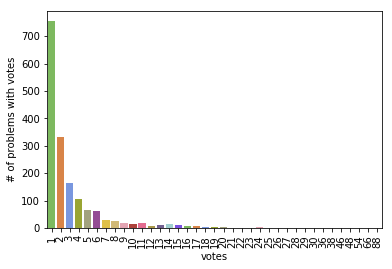

In [5]:
# of problems with >= 5 feedback records. (problems need >= 5 records to be assigned a tag and shown on the UI)    
grouped = df3.groupby('problem_id')
problems = grouped['problem_id'].agg([np.size])
problems_h = problems
problems = problems[problems['size'] >= 5]

print("problems greater than equal to 5 are " , (problems.shape)[0])

# plt.hist(grouped['problem_id'].agg([np.size])['size'].tolist(),10,range=[0,40],facecolor='blue', alpha=0.5)
# plt.xticks(np.arange(0, 40 , 2.0))
# plt.xlabel("problem votes")
# plt.ylabel("#of problem with particular vote")
# plt.show()


# print(problems)
# print(collections.Counter(problems['size']))

sns.countplot(x='size', data=problems_h, palette=pkmn_type_colors)
plt.xticks(rotation=+90)
plt.xlabel("votes")
plt.ylabel("# of problems with votes")
plt.show()

In [6]:
grouped = df3.groupby('problem_id')
problems = grouped['problem_id'].agg([np.size])
problems = problems[problems['size'] < 5]
print("problems less than 5 are " ,( problems.shape)[0])



problems less than 5 are  1359


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Counter({3: 1507, 4: 1337, 2.0: 739, 0.0: 126, 1: 64})


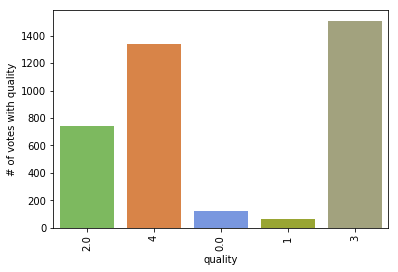

In [7]:

# * Histogram of total number of votes for each possible quality.
quality_h = df3['quality']
quality_h_n = quality_h.dropna()
quality_h_n.columns = ['id','quality']
print(type(quality_h_n))
print(type(quality_h))
print(type(df3))

print(collections.Counter(quality_h_n))



sns.countplot(x=quality_h,data=quality_h, palette=pkmn_type_colors)
plt.xticks(rotation=+90)
plt.xlabel("quality")
plt.ylabel("# of votes with quality")
plt.show()

Counter({1: 1656, 0: 1653, 2.0: 1289, 3: 413, 4: 251, 5: 9})


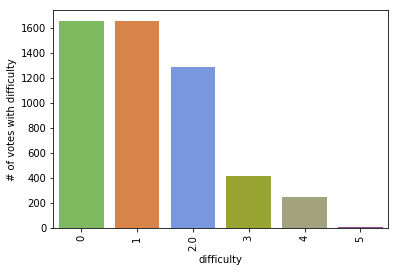

In [8]:
# * Histogram of total number of votes for each possible difficulty.

difficulty_h = df3['difficulty']
difficulty_h_n = difficulty_h.dropna()
# print(difficulty_h_n)
print(collections.Counter(difficulty_h_n))

# plt.figure(figsize=(10,10))
sns.countplot(x=difficulty_h,data=difficulty_h, palette=pkmn_type_colors)
plt.xticks(rotation=+90)
plt.xlabel("difficulty")
plt.ylabel("# of votes with difficulty")
plt.show()

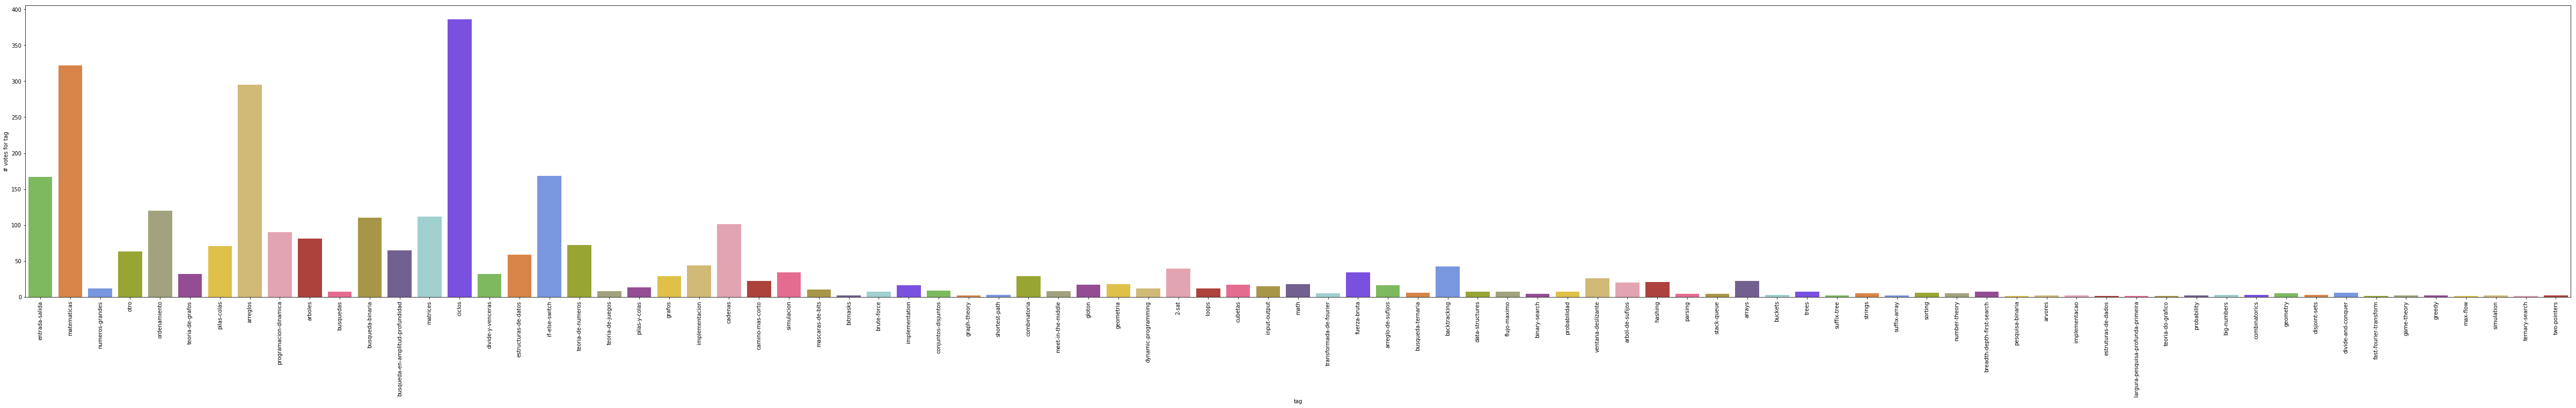

In [9]:

# votes by tag
plt.figure(figsize=(85,10))
sns.countplot(x='tag', data=df4, palette=pkmn_type_colors)
plt.xticks(rotation=+90)
plt.ylabel('# votes for tag')
plt.show()

85


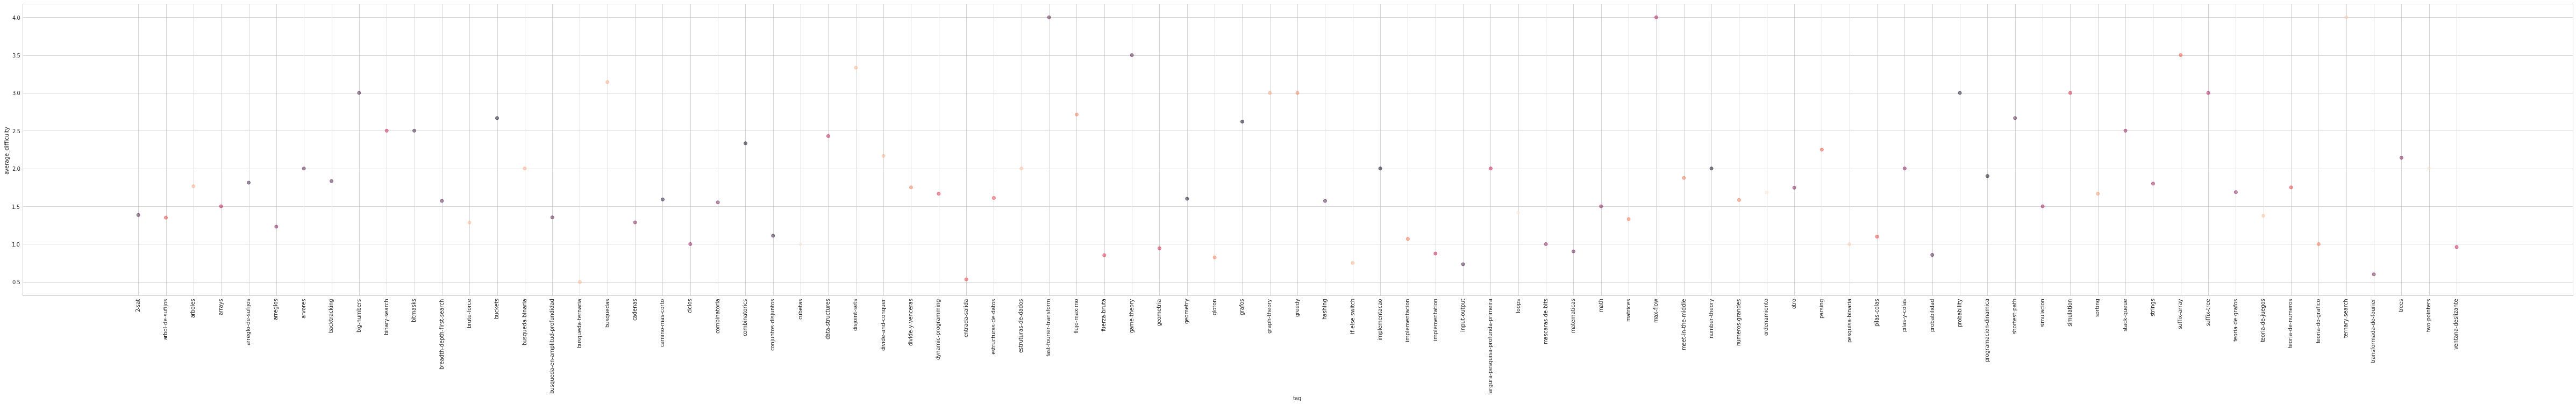

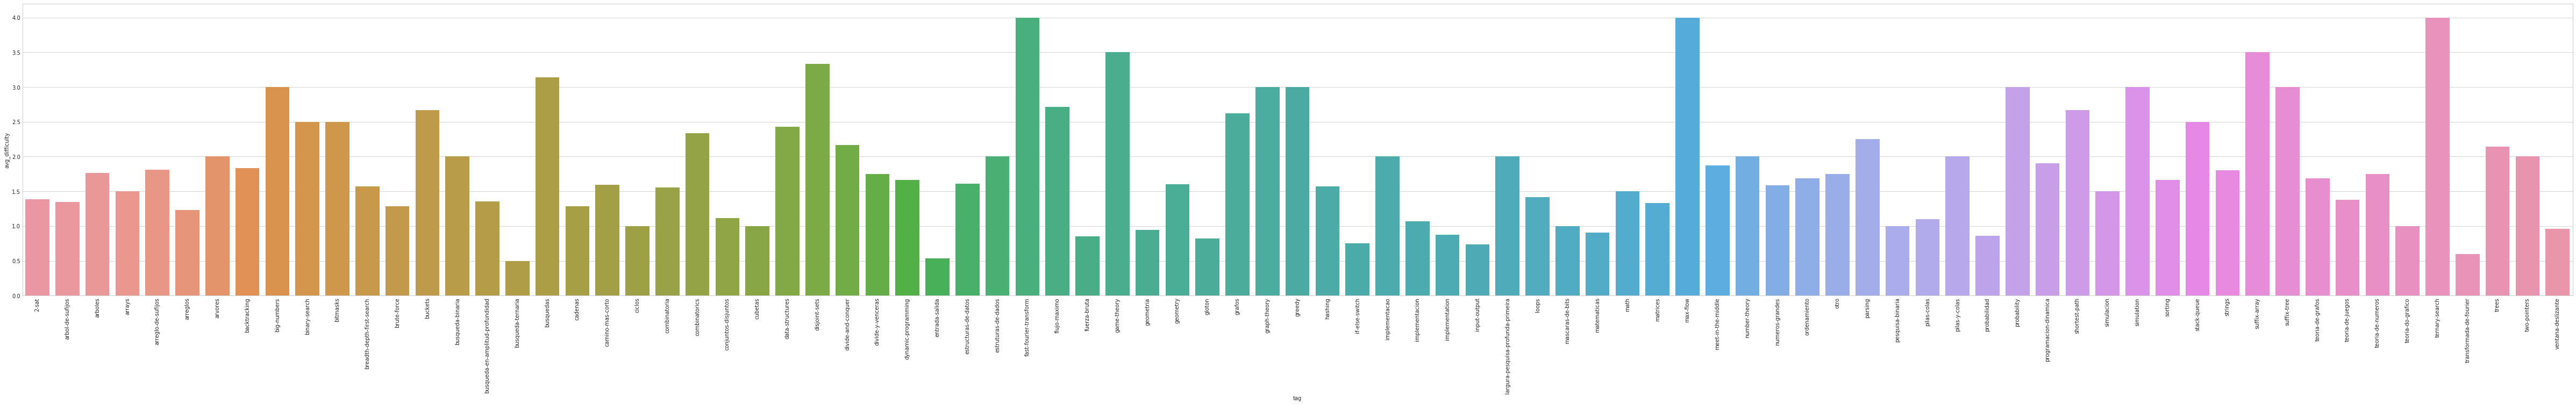

In [89]:
# avg difficulty for each tag

grp = df4.groupby(['tag'])
grp= grp['difficulty'].agg([np.sum,np.size])
grp['avg_difficulty'] = grp['sum']/grp['size']
grp['tag'] = grp.index

plt.figure(figsize=(85,10))

x= grp['tag']
y= grp['avg_difficulty']

N= (grp.shape)[0]
print(N)

colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xticks(rotation=+90)
plt.xlabel("tag")
plt.ylabel("average_difficulty")
plt.show()



plt.figure(figsize=(85,10))
sns.barplot(x=  grp['tag'] , y= grp['avg_difficulty'])
plt.xticks(rotation=+90)
plt.show()


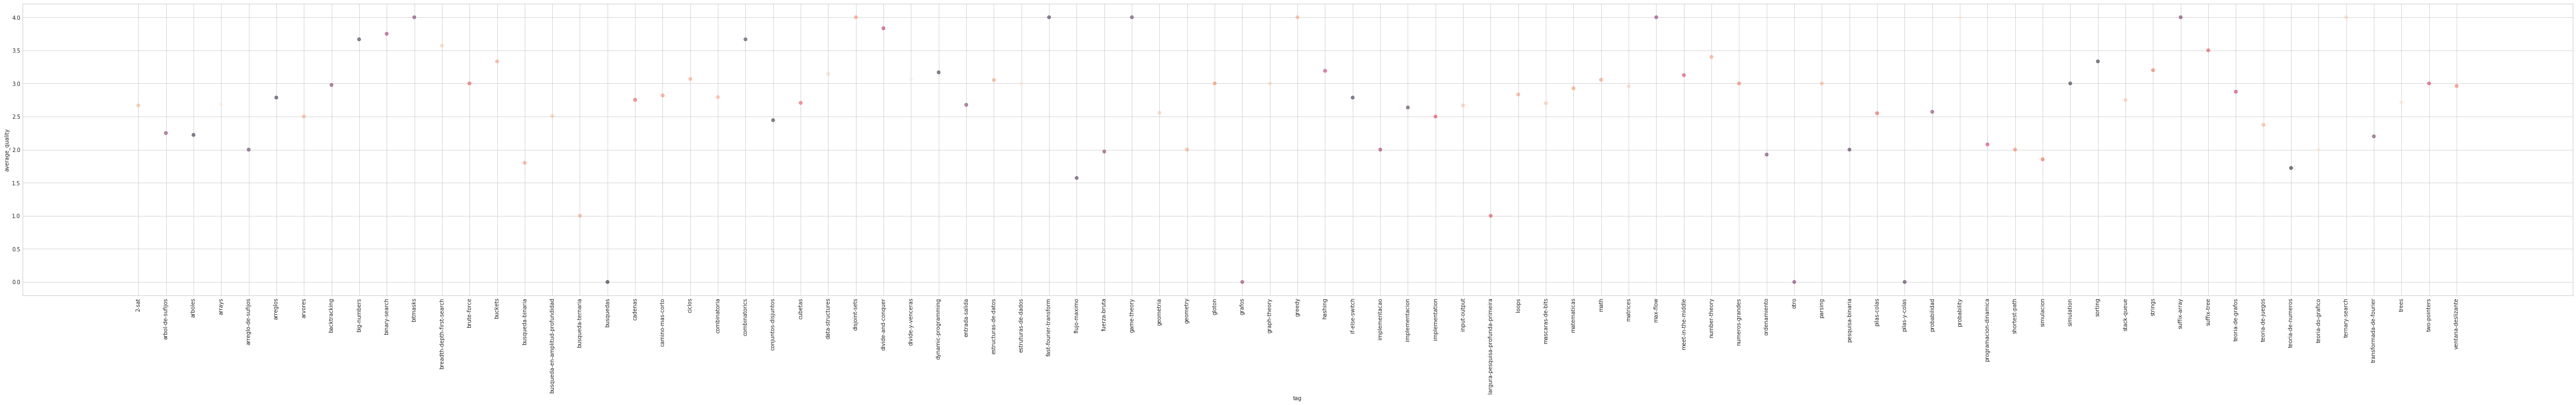

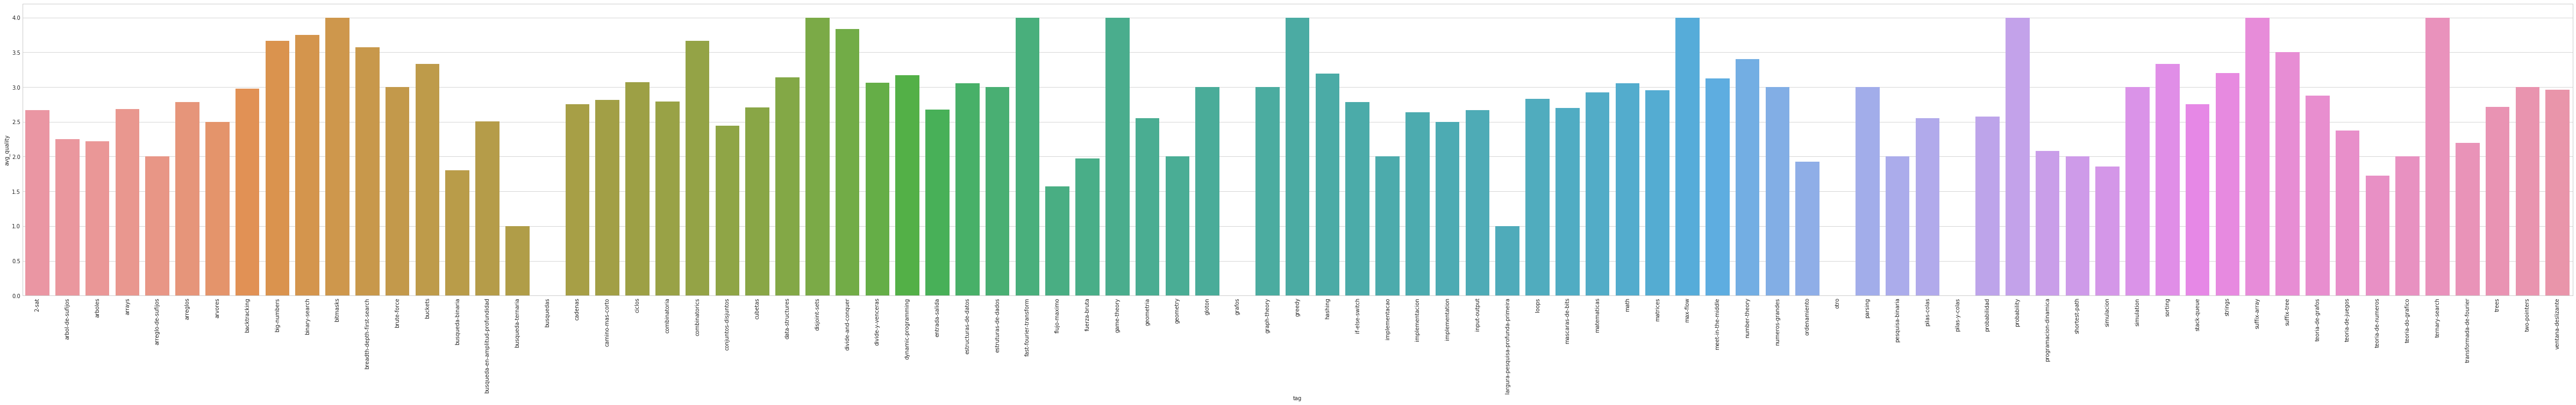

In [88]:
# average quality for each tag

grp = df4.groupby(['tag'])
grp= grp['quality'].agg([np.sum,np.size])
grp['avg_quality'] = grp['sum']/grp['size']
grp['tag'] = grp.index
# print(grp)

plt.figure(figsize=(85,10))
x= grp['tag']
y= grp['avg_quality']
N= (grp.shape)[0]
# print(N)
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xticks(rotation=+90)
plt.xlabel("tag")
plt.ylabel("average_quality")
plt.show()



# plt.figure(figsize=(85,10))
# sns.countplot(x='tag' , data=grp, palette=pkmn_type_colors)
# plt.xticks(rotation=+90)
# plt.xlabel('tag')
# plt.ylabel('# avg_quality')
# plt.show()

plt.figure(figsize=(85,10))
sns.barplot(x=  grp['tag'] , y= grp['avg_quality'])
plt.xticks(rotation=+90)
plt.show()


In [65]:
a= df3['quality']
b= df3['difficulty']
a=a.dropna()
b=b.dropna()
# print(a)
# print(b)

print("quality distribution= ",  collections.Counter(a))
print("difficulty distribution= ", collections.Counter(b))

ca=collections.Counter(a)
cb=collections.Counter(b)

dfn = pd.DataFrame(index=ca,columns=cb)

for i in ca:
    for j in cb:
        ta= (df3['quality']==i)
        tb= (df3['difficulty']==j)
#         print(i,j)
        temp = df3[( (df3['quality']==i) &  (df3['difficulty']==j) )]
#         print(temp.shape)
        dfn.loc[i][j]= (temp.shape)[0]
#         print(x)
print("\n\n")
print("contingency matrix")
print("on rows have quality ")
print("on cols we have difficulty")
print("\n\n")
print(dfn)


# def color_negative_red(val):
#     """
#     Takes a scalar and returns a string with
#     the css property `'color: red'` for negative
#     strings, black otherwise.
#     """
#     color = 'red' if val < 0 else 'black'
#     return 'color: %s' % color

# print(df.style.applymap(color_negative_red))

# to control no of cols rows
# with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
#     print(dfn)

# df.style.applymap(color_negative_red)
# print(dfn.style.render())
# dfn.style.render()

quality distribution=  Counter({3: 1507, 4: 1337, 2.0: 739, 0.0: 126, 1: 64})
difficulty distribution=  Counter({1: 1656, 0: 1653, 2.0: 1289, 3: 413, 4: 251, 5: 9})



contingency matrix
on rows have quality 
on cols we have difficulty



     0.0  1.0  2.0  3.0 4.0 5.0
0.0   72    7   10    4  19   0
1.0   37   12    4    3   4   0
2.0  298  257  105   28  11   0
3.0  269  632  439   76  18   0
4.0  449  316  321  110  75   0


In [69]:
tot_q=0
for k,v in ca.items():
    tot_q= tot_q+v

print("no of recors with non empty quality - ", tot_q)

tot_d=0
for k,v in cb.items():
    tot_d= tot_d+v
    
print("no of recors with non empty quality - ", tot_d)

print("total records with at least one tag - " , total_records_at_least_one_tag)

no of recors with non empty quality -  3773
no of recors with non empty quality -  5271
total records with at least one tag -  2414


In [85]:
dfnon = pd.DataFrame(columns=['nonempty quality','nonempty difficulty','noneempty tag'])
d = {'nonempty quality':tot_q , 'nonempty difficulty' : tot_d , 'noneempty tag': total_records_at_least_one_tag}
dfnon.append(d,ignore_index=True)

,nonempty quality,nonempty difficulty,noneempty tag
0,3773,5271,2414


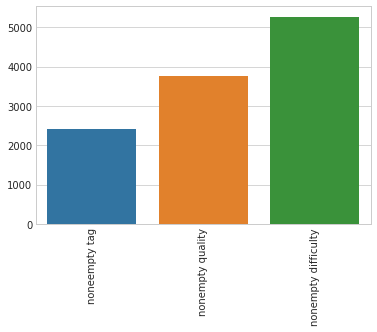

In [86]:
import seaborn as sns
sns.set_style("whitegrid")
# tips = sns.load_dataset("dfnon")
sns.barplot(x= [ k for k,v in d.items()] , y=[v for k,v in d.items()])
plt.xticks(rotation=+90)
plt.show()